In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# #Run this block when starting colab for first time
# !sudo apt-get install build-essential swig
# !pip install auto-sklearn==0.10.0

In [ ]:
import numpy as np
import pickle as pickle
import pandas as pd
from scipy.stats import skew,kurtosis
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold,RepeatedKFold
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate,cross_val_score
from sklearn.utils import shuffle
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE





import os
import tensorflow as tf
import time
import sys
sys.path.append("..")
# import autosklearn.classification

In [ ]:
A = np.load('/content/drive/MyDrive/Thesis data/A.npy') # File with all(40) channel data
B = np.load('/content/drive/MyDrive/Thesis data/B.npy') #File with only data from left hemisphere 
A_norm = np.load('/content/drive/MyDrive/Thesis data/Anorm.npy') # normalised 40 channel data
B_norm = np.load('/content/drive/MyDrive/Thesis data/Anorm.npy') # normalised 7 channel data
print("A.shape =",A.shape)
print("B.shape =",B.shape)
#Load the labels now    
valence = np.genfromtxt('/content/drive/MyDrive/Thesis data/label_class_0.dat', delimiter=' ')
arousal = np.genfromtxt('/content/drive/MyDrive/Thesis data/label_class_1.dat', delimiter=' ')
dominance = np.genfromtxt('/content/drive/MyDrive/Thesis data/label_class_2.dat', delimiter=' ')
liking = np.genfromtxt('/content/drive/MyDrive/Thesis data/label_class_3.dat', delimiter=' ')


A.shape = (51200, 99)
B.shape = (8960, 99)


## Augmenting data below
Start with the labels<br>
For example va2 means valence augmented twice<br>
ar3 means arousal augmented thrice

In [ ]:
###################################
# Augmenting the labels 
# 2x
va2 = np.hstack((valence,valence))
ar2 = np.hstack((arousal,arousal))
do2 = np.hstack((dominance,dominance))
li2 = np.hstack((liking,liking))


# 3x
va3 = np.hstack((valence,valence,valence))
ar3 = np.hstack((arousal,arousal,arousal))
do3 = np.hstack((dominance,dominance,dominance))
li3 = np.hstack((liking,liking,liking))

# 4x
va4 = np.hstack((valence,valence,valence,valence))
ar4 = np.hstack((arousal,arousal,arousal,arousal))
do4 = np.hstack((dominance,dominance,dominance,dominance))
li5 = np.hstack((liking,liking,liking,liking))


# 5x
va5 = np.hstack((valence,valence,valence,valence,valence))
ar5 = np.hstack((arousal,arousal,arousal,arousal,arousal))
do5 = np.hstack((dominance,dominance,dominance,dominance,dominance))
li5 = np.hstack((liking,liking,liking,liking,liking))

# 10x
va10 = np.hstack((valence,valence,valence,valence,valence,valence,valence,valence,valence,valence))
ar10 = np.hstack((arousal,arousal,arousal,arousal,arousal,arousal,arousal,arousal,arousal,arousal))
do10 = np.hstack((dominance,dominance,dominance,dominance,dominance,dominance,dominance,dominance,dominance,dominance))
li10 = np.hstack((liking,liking,liking,liking,liking,liking,liking,liking,liking,liking))

## Get some generated data points<br>
Get the data points with generator and discriminator close to zero and least as possible

In [ ]:
g1 =np.load('/content/drive/MyDrive/Thesis data/Generated data/Generated_ep78.npy') # generated data with all(40) channel data

g2 =np.load('/content/drive/MyDrive/Thesis data/Generated data/Generated_ep80.npy') # generated data with all(40) channel data

g3 =np.load('/content/drive/MyDrive/Thesis data/Generated data/Generated_ep86.npy') # generated data with all(40) channel data

g4 =np.load('/content/drive/MyDrive/Thesis data/Generated data/Generated_ep88.npy') # generated data with all(40) channel data

g5 =np.load('/content/drive/MyDrive/Thesis data/Generated data/Generated_ep90.npy') # generated data with all(40) channel data

g6 =np.load('/content/drive/MyDrive/Thesis data/Generated data/Generated_ep92.npy') # generated data with all(40) channel data

g7 =np.load('/content/drive/MyDrive/Thesis data/Generated data/Generated_ep93.npy') # generated data with all(40) channel data

g8 =np.load('/content/drive/MyDrive/Thesis data/Generated data/Generated_ep94.npy') # generated data with all(40) channel data

g9 =np.load('/content/drive/MyDrive/Thesis data/Generated data/Generated_ep95.npy') # generated data with all(40) channel data

g10 =np.load('/content/drive/MyDrive/Thesis data/Generated data/Generated_ep100.npy') # generated data with all(40) channel data


g1.shape

(1280, 40, 99)

## Augment the data

In [ ]:
###################################
# Augmenting the data 
print("Augmenting data............")

# 2x
data2 = np.concatenate([g7, A_norm], 0) 
print(data2.shape)

# 3x
data3 = np.concatenate([g7,g1, A_norm], 0)
print(data3.shape)

# 4x
data4 = np.concatenate([g7,g1,g2, A_norm], 0)
print(data4.shape)


# 5x
data5 = np.concatenate([g7,g1,g2,g3, A_norm], 0)
print(data5.shape)

# 10x
data10 = np.concatenate([g1,g2,g3,g4,g5,g6,g7,g8,g9, A_norm], 0)
print(data10.shape)

Augmenting data............
(2560, 40, 99)
(3840, 40, 99)
(5120, 40, 99)
(6400, 40, 99)
(12800, 40, 99)


## PCA and t-SNE on original dataset

Let me first do it for Original dataset, convert the numpy array into a dataframe object for better handling <br>
t-sne 


In [ ]:
X = A_norm.reshape(-1,40*99)
y = valence
cols = [ 'feat'+str(i) for i in range(X.shape[1]) ]
df = pd.DataFrame(X,columns=cols)
df['y'] = y
df['label'] = df['y'].apply(lambda i: str(i))
X, y = None, None
print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (1280, 3962)


In [ ]:
# Check the dataframe format
df.head()


,feat0,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,feat9,feat10,feat11,feat12,feat13,feat14,feat15,feat16,feat17,feat18,feat19,feat20,feat21,feat22,feat23,feat24,feat25,feat26,feat27,feat28,feat29,feat30,feat31,feat32,feat33,feat34,feat35,feat36,feat37,feat38,feat39,...,feat3922,feat3923,feat3924,feat3925,feat3926,feat3927,feat3928,feat3929,feat3930,feat3931,feat3932,feat3933,feat3934,feat3935,feat3936,feat3937,feat3938,feat3939,feat3940,feat3941,feat3942,feat3943,feat3944,feat3945,feat3946,feat3947,feat3948,feat3949,feat3950,feat3951,feat3952,feat3953,feat3954,feat3955,feat3956,feat3957,feat3958,feat3959,y,label
0,0.001058,0.001824,0.000647,0.997983,0.000573,3.294752e-07,0.001076,0.251566,0.461029,0.001657,0.001610,0.000498,0.176145,0.000916,8.396862e-07,0.002048,0.366120,0.456605,0.297649,0.975500,0.000461,0.999306,0.000268,7.200381e-08,0.000555,0.248077,0.357092,0.988198,0.980703,0.874617,0.999272,0.001711,2.932060e-06,0.002942,0.343333,0.395987,0.809123,0.811263,0.003165,0.993124,...,0.777171,0.140472,0.055247,0.052314,0.010941,0.998662,0.0,0.0,0.0,0.144268,0.355705,0.955324,0.960716,0.020382,0.999639,0.0,0.0,0.0,0.167405,0.013114,0.861372,0.830007,0.024861,0.997250,0.0,0.0,0.0,0.070045,0.249840,0.108951,0.077402,0.0,1.0,0.0,0.0,0.0,0.122541,0.000000,1.0,1.0
1,0.006981,0.004791,0.001427,0.997596,0.001192,1.422007e-06,0.001847,0.333699,0.315219,0.417217,0.318196,0.000949,0.997848,0.000982,9.646187e-07,0.001586,0.673483,0.518599,0.709820,0.712910,0.310709,0.996159,0.001448,2.097377e-06,0.002437,0.100171,0.055545,0.317609,0.282231,0.013804,0.993432,0.001579,2.496864e-06,0.002871,0.119025,0.333165,0.022252,0.022402,0.007912,0.700269,...,0.399124,0.242183,0.318385,0.289763,0.045865,0.984169,0.0,0.0,0.0,0.498137,0.000000,0.871503,0.859285,0.078931,0.994832,0.0,0.0,0.0,0.202283,0.004563,0.919871,0.899950,0.750139,0.998240,0.0,0.0,0.0,0.653122,0.023551,0.491061,0.297920,0.0,1.0,0.0,0.0,0.0,0.600775,0.178386,1.0,1.0
2,0.781862,0.846093,0.001523,0.998274,0.000679,4.623646e-07,0.001637,0.375920,0.052782,0.057148,0.047710,0.005104,0.959753,0.000586,3.443380e-07,0.001143,0.412410,0.416598,0.009521,0.009598,0.002038,0.417700,0.000755,5.714405e-07,0.001362,0.283902,0.643688,0.005702,0.006004,0.002058,0.228373,0.001151,1.326828e-06,0.001991,0.624785,0.687804,0.097903,0.070734,0.012144,0.370968,...,0.467930,0.000000,0.913892,0.918798,0.815880,0.979220,0.0,0.0,0.0,0.520886,0.006868,0.918389,0.917167,0.878992,0.971974,0.0,0.0,0.0,0.000000,0.028824,0.996995,0.998512,0.921319,0.999746,0.0,0.0,0.0,0.405857,0.000000,0.802867,0.560412,0.0,1.0,0.0,0.0,0.0,0.296342,0.074156,1.0,1.0
3,0.027139,0.023516,0.001774,0.997331,0.000952,9.061493e-07,0.002245,0.763526,0.157355,0.008448,0.012010,0.000902,0.658503,0.000968,9.425258e-07,0.001681,0.250731,0.583723,0.005199,0.005336,0.001469,0.748121,0.000509,2.598204e-07,0.001113,0.363677,0.381320,0.707479,0.712019,0.302483,0.825139,0.000632,4.009784e-07,0.000973,0.553696,0.764007,0.245073,0.250731,0.001087,0.647846,...,1.000000,0.333227,0.242379,0.241251,0.000000,0.528296,0.0,0.0,0.0,0.000000,0.061169,0.050382,0.050676,0.000000,0.388852,0.0,0.0,0.0,0.366532,0.028396,0.338341,0.320905,0.000000,0.627958,0.0,0.0,0.0,0.666212,0.000000,0.226089,0.151769,0.0,1.0,0.0,0.0,0.0,0.605512,0.002901,0.0,0.0
4,0.150868,0.031916,0.001475,0.998669,0.000802,6.439843e-07,0.001402,0.563498,0.439200,0.984284,0.983594,0.387637,0.999190,0.000217,4.705965e-08,0.000439,0.528483,0.346767,0.997078,0.996952,0.885361,0.998600,0.000500,2.502230e-07,0.000785,0.118467,0.316931,0.907349,0.899463,0.584813,0.996544,0.000795,6.331500e-07,0.001433,0.449153,0.663520,0.887333,0.898249,0.410567,0.958124,...,0.092862,0.000000,0.147608,0.151419,0.018328,0.504278,0.0,0.0,0.0,1.000000,0.026309,0.075389,0.069035,0.018891,0.461607,0.0,0.0,0.0,0.666302,0.093938,0.081532,0.084298,0.020772,0.332035,0.0,0.0,0.0,1.000000,0.247323,0.689194,0.642154,0.0,1.0,0.0,0.0,0.0,0.769244,0.000000,1.0,1.0


In [ ]:
# For reproducability of the results
np.random.seed(42)
rndperm = np.random.permutation(df.shape[0])

In [ ]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(df[cols].values)
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
# Explained variation per principal component: [0.32082163 0.0839856  0.05980295]

Explained variation per principal component: [0.32082163 0.0839856  0.05980295]


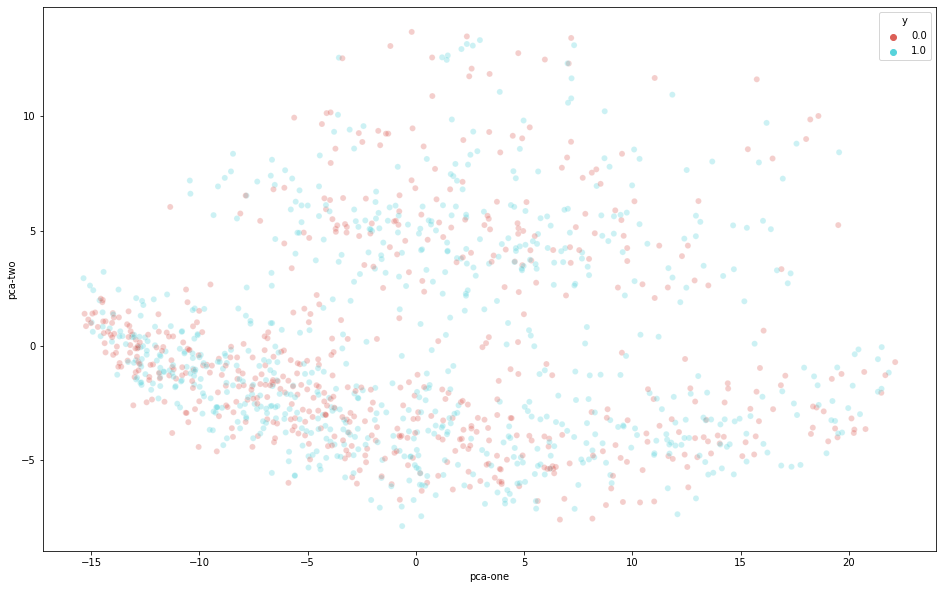

In [ ]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", 2),
    data=df.loc[rndperm,:],
    legend="full",
    alpha=0.3)

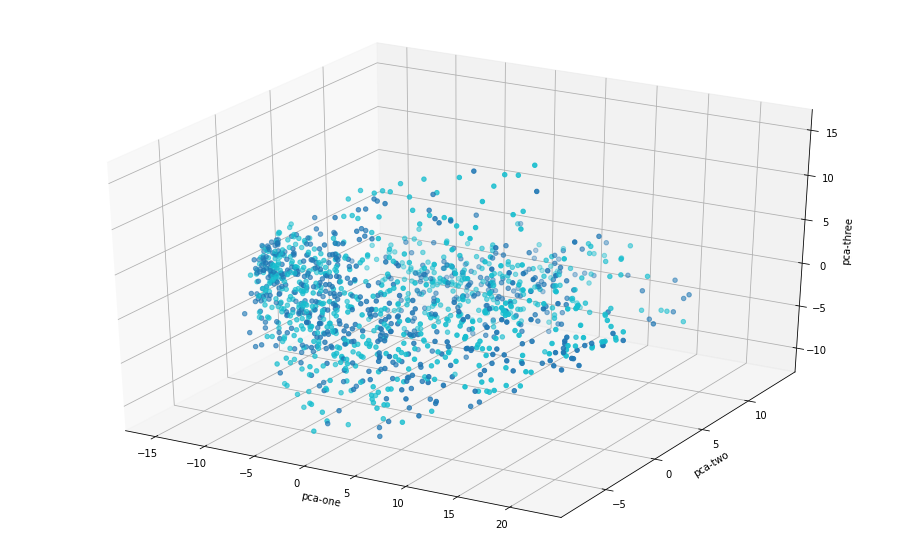

In [ ]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=df.loc[rndperm,:]["pca-one"], 
    ys=df.loc[rndperm,:]["pca-two"], 
    zs=df.loc[rndperm,:]["pca-three"], 
    c=df.loc[rndperm,:]["y"], 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

In [ ]:
N = 1280
df_subset = df.loc[rndperm[:N],:].copy()
data_subset = df_subset[cols].values
pca = PCA(n_components=3)
pca_result = pca.fit_transform(data_subset)
df_subset['pca-one'] = pca_result[:,0]
df_subset['pca-two'] = pca_result[:,1] 
df_subset['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
# Explained variation per principal component: [0.32082163 0.0839856  0.05980295]

Explained variation per principal component: [0.32082163 0.0839856  0.05980295]


In [ ]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data_subset)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1280 samples in 0.446s...
[t-SNE] Computed neighbors for 1280 samples in 15.190s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1280
[t-SNE] Computed conditional probabilities for sample 1280 / 1280
[t-SNE] Mean sigma: 4.260741
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.180367
[t-SNE] KL divergence after 300 iterations: 1.153147
t-SNE done! Time elapsed: 19.02154016494751 seconds


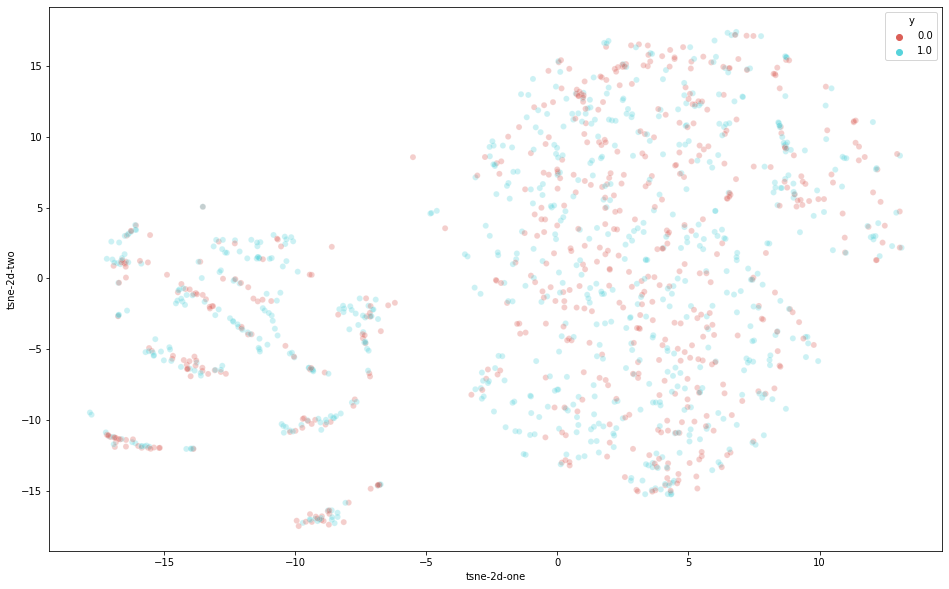

In [ ]:
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 2),
    data=df_subset,
    legend="full",
    alpha=0.3
)


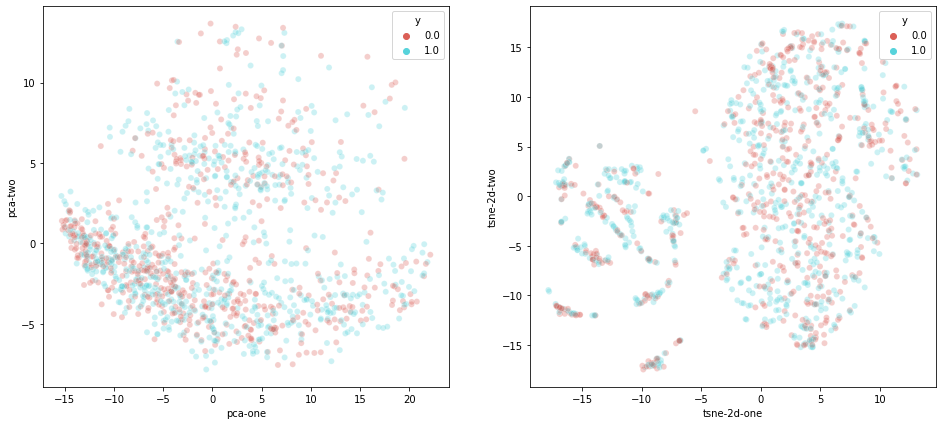

In [ ]:
plt.figure(figsize=(16,7))
ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", 2),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax1
)
ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 2),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax2
)

In [ ]:
pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(data_subset)
print('Cumulative explained variation for 50 principal components: {}'.format(np.sum(pca_50.explained_variance_ratio_)))
# Cumulative explained variation for 50 principal components: 0.8304700775040327

Cumulative explained variation for 50 principal components: 0.8304571906085425


## Try it on the generated dataset

Let me now do it for generated dataset, convert the numpy array into a dataframe object for better handling

In [ ]:
X = g7.reshape(-1,40*99)
y = valence
cols = [ 'feat'+str(i) for i in range(X.shape[1]) ]
df = pd.DataFrame(X,columns=cols)
df['y'] = y
df['label'] = df['y'].apply(lambda i: str(i))
X, y = None, None
print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (1280, 3962)


In [ ]:
# Check the dataframe format
df.head()


,feat0,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,feat9,feat10,feat11,feat12,feat13,feat14,feat15,feat16,feat17,feat18,feat19,feat20,feat21,feat22,feat23,feat24,feat25,feat26,feat27,feat28,feat29,feat30,feat31,feat32,feat33,feat34,feat35,feat36,feat37,feat38,feat39,...,feat3922,feat3923,feat3924,feat3925,feat3926,feat3927,feat3928,feat3929,feat3930,feat3931,feat3932,feat3933,feat3934,feat3935,feat3936,feat3937,feat3938,feat3939,feat3940,feat3941,feat3942,feat3943,feat3944,feat3945,feat3946,feat3947,feat3948,feat3949,feat3950,feat3951,feat3952,feat3953,feat3954,feat3955,feat3956,feat3957,feat3958,feat3959,y,label
0,0.676829,0.621047,0.040662,0.849044,-0.021491,-0.033227,-0.072683,0.299542,0.507722,0.944307,0.963298,0.698909,0.962255,-0.080704,-0.072790,-0.171388,0.788582,0.758994,0.921291,0.956041,0.606482,0.978359,-0.020469,-0.056073,-0.072552,0.219625,0.741904,0.869356,0.919544,0.641553,0.952010,-0.048159,0.036603,-0.110331,0.218356,0.402386,0.873809,0.897216,0.466285,0.830053,...,0.358498,0.307658,0.516522,0.451603,0.676454,0.442095,0.714128,0.727084,0.916994,0.997012,0.857785,0.419685,-0.075942,0.253291,0.649334,0.482875,0.477727,0.714243,0.269455,-0.246109,0.046758,-0.000099,-0.298921,0.535784,0.416314,0.063355,0.401183,0.921178,-0.149326,0.292969,0.239745,0.268368,0.955696,-0.328341,-0.280742,-0.238476,0.289793,0.478331,1.0,1.0
1,-0.148295,0.153299,0.076757,0.962104,0.028155,-0.144149,0.055381,0.150468,0.619041,-0.150447,-0.008229,0.041993,0.078494,0.079056,0.029245,-0.007889,0.320203,0.358360,-0.022749,0.030425,0.065399,-0.101263,0.011855,-0.019748,-0.062758,0.473630,0.644101,0.012068,-0.030692,-0.080413,0.407223,-0.016910,-0.001921,-0.024263,0.231126,0.267302,0.208627,0.163484,-0.022697,0.853722,...,0.060796,-0.060889,0.366862,0.325241,-0.028454,0.629257,-0.095458,-0.084172,-0.044869,0.186737,-0.022085,-0.047986,0.090830,0.124870,0.188443,-0.124720,-0.257524,-0.092421,0.154543,0.051873,0.041553,0.053446,-0.098621,0.125632,-0.082304,-0.067760,-0.009916,0.262397,0.025193,-0.041761,0.009569,-0.030225,0.866174,-0.084971,-0.028332,0.054474,0.531203,0.188925,1.0,1.0
2,0.705986,0.793365,0.051355,0.903093,0.150915,0.144255,0.088184,0.289014,0.498142,0.805734,0.692567,0.524174,0.760054,0.136603,0.067685,0.002276,0.260211,0.236740,0.600208,0.619773,0.419025,0.717791,0.053014,0.046184,-0.034354,0.301588,-0.107912,0.356016,0.539057,0.267206,0.467632,0.025300,-0.040640,0.101106,0.057079,0.730540,0.398272,0.558271,0.496437,0.562230,...,0.895330,0.607981,0.356445,-0.049343,0.007840,0.379661,0.833407,0.824047,0.831028,0.762410,-0.337642,0.037838,-0.128085,-0.155132,0.970230,0.215561,-0.261399,-0.084998,-0.024968,-0.050470,0.653692,0.623075,0.389548,0.806543,0.177290,-0.054574,-0.018169,0.200870,0.112275,0.749683,0.805246,-0.005924,0.969621,0.048573,-0.006859,-0.061498,0.550688,0.215348,1.0,1.0
3,0.675608,0.871783,0.088694,0.943303,0.014671,0.030292,0.050673,0.333697,0.357264,0.299855,0.313616,0.278810,0.489413,0.044037,0.071311,0.010996,-0.025552,0.453241,0.341114,0.240466,0.004051,0.525119,0.077814,-0.001687,-0.031568,0.544428,0.240041,0.056002,0.123473,0.112796,0.168979,0.124792,0.124181,0.147363,0.151220,0.294093,0.105022,0.183803,0.197271,0.055007,...,0.271681,-0.071165,0.679406,0.623736,0.283706,0.828816,0.037907,0.098841,0.047455,0.490694,-0.047205,0.465995,0.485805,0.288077,0.414169,0.231268,0.103246,0.160635,0.466831,0.114148,0.910548,0.915323,0.822042,0.932741,-0.152598,-0.028992,0.160424,0.445816,0.061728,0.369738,0.493303,0.140575,0.788831,0.799939,0.711422,0.762230,0.700062,0.122464,0.0,0.0
4,0.732224,0.847702,0.118272,0.937060,-0.019481,-0.008068,-0.132459,0.600721,0.501546,0.874053,0.909569,0.486204,0.967512,-0.073141,0.001966,-0.081224,0.394449,-0.005327,0.265303,0.369753,-0.022141,0.686401,-0.018048,-0.039345,0.019950,-0.119306,0.554165,0.107554,0.042667,0.243436,0.079720,0.105500,0.021430,0.195102,0.104825,0.474196,0.269421,0.241847,0.373943,0.080526,...,0.300549,0.522316,0.605654,0.629511,0.602942,0.478996,0.7336

In [ ]:
# For reproducability of the results
np.random.seed(42)
rndperm = np.random.permutation(df.shape[0])

In [ ]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(df[cols].values)
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
# Explained variation per principal component: [0.32082163 0.0839856  0.05980295]

Explained variation per principal component: [0.21526329 0.19293705 0.08577349]


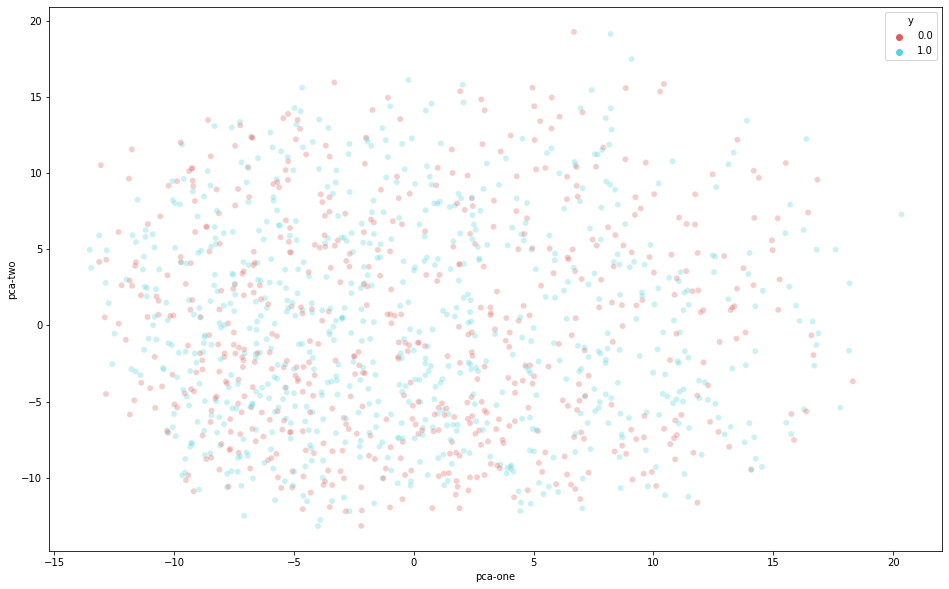

In [ ]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", 2),
    data=df.loc[rndperm,:],
    legend="full",
    alpha=0.3)

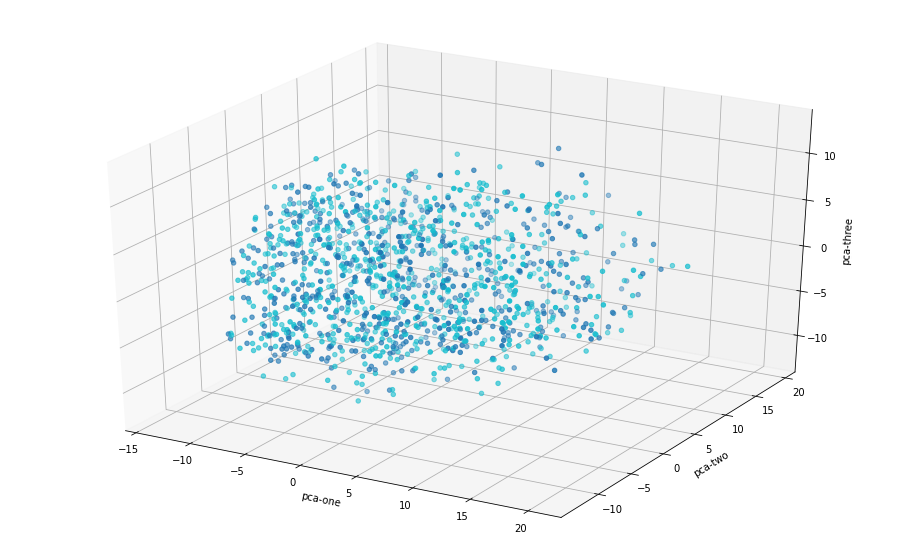

In [ ]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=df.loc[rndperm,:]["pca-one"], 
    ys=df.loc[rndperm,:]["pca-two"], 
    zs=df.loc[rndperm,:]["pca-three"], 
    c=df.loc[rndperm,:]["y"], 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

In [ ]:
N = 1280
df_subset = df.loc[rndperm[:N],:].copy()
data_subset = df_subset[cols].values
pca = PCA(n_components=3)
pca_result = pca.fit_transform(data_subset)
df_subset['pca-one'] = pca_result[:,0]
df_subset['pca-two'] = pca_result[:,1] 
df_subset['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
# Explained variation per principal component: [0.32082163 0.0839856  0.05980295]         original dataset

Explained variation per principal component: [0.21526329 0.19293705 0.08577349]


In [ ]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data_subset)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1280 samples in 0.454s...
[t-SNE] Computed neighbors for 1280 samples in 15.331s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1280
[t-SNE] Computed conditional probabilities for sample 1280 / 1280
[t-SNE] Mean sigma: 4.007135
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.539810
[t-SNE] KL divergence after 300 iterations: 1.396696
t-SNE done! Time elapsed: 19.608810663223267 seconds


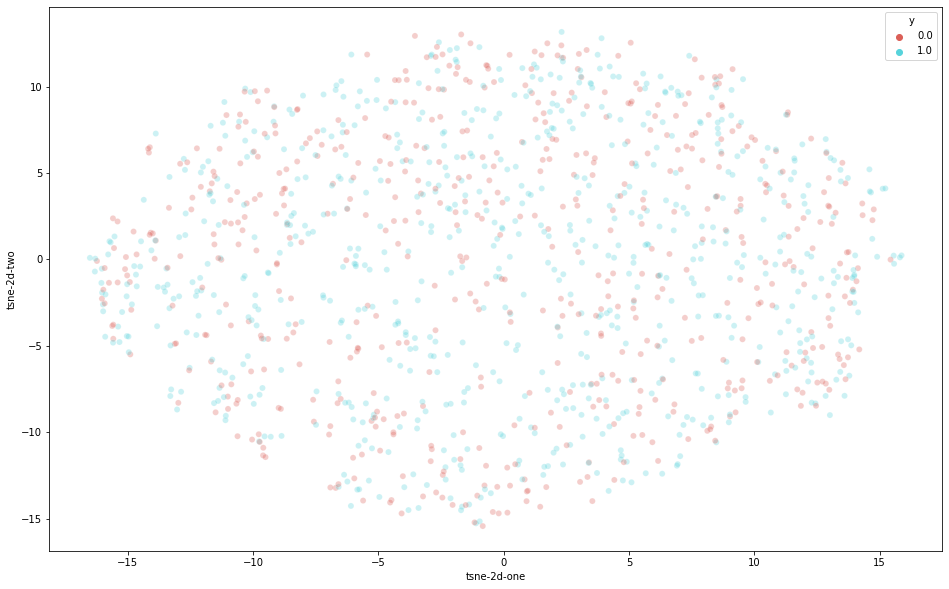

In [ ]:
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 2),
    data=df_subset,
    legend="full",
    alpha=0.3
)


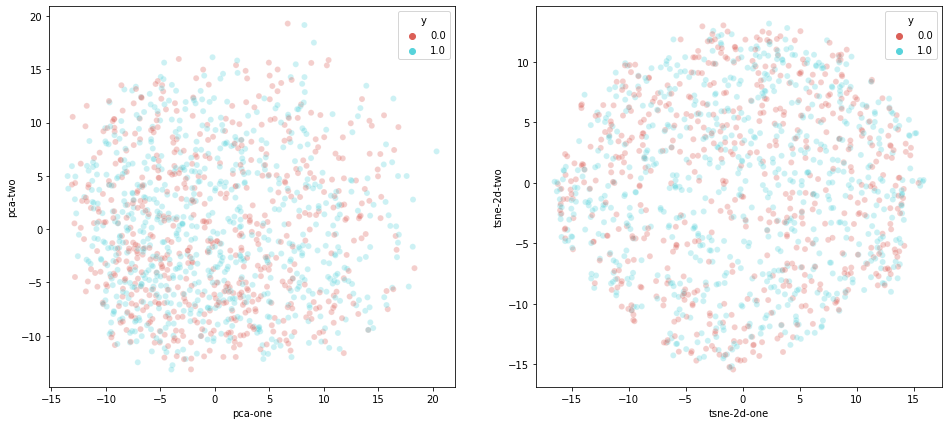

In [ ]:
plt.figure(figsize=(16,7))
ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", 2),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax1
)
ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 2),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax2
)

In [ ]:
pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(data_subset)
print('Cumulative explained variation for 50 principal components: {}'.format(np.sum(pca_50.explained_variance_ratio_)))
# [out] Cumulative explained variation for 50 principal components: 0.8267618822147329

Cumulative explained variation for 50 principal components: 0.7799195520110117
